## Opening/Closing Days
#### 2011/2012: 11/12/2011-4/22/2012
#### 2012/2013: 11/14/2012-4/21/2013
#### 2013/2014: 11/13/2013-4/27/2014
#### 2014/2015: 11/15/2014-4/26/2015

In [864]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

%load_ext autoreload
%autoreload 2
from functions import *
from plots import *

%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 8  # plotsize 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import Traffic

In [944]:
df_traf = pd.DataFrame.from_csv('../data_ski_in_solitude/berthoud_2013_14_traf.csv', parse_dates=True, index_col=27)

In [945]:
df_traf.tail()

,COUNTSTATIONID,COUNTDATE,COUNTDIR,HOUR0,HOUR1,HOUR2,HOUR3,HOUR4,HOUR5,HOUR6,...,HOUR14,HOUR15,HOUR16,HOUR17,HOUR18,HOUR19,HOUR20,HOUR21,HOUR22,HOUR23
FormattedDate,,,,,,,,,,,,,,,,,,,,,
2014-04-24,223,20140424,S,9,6,4,8,42,127,39,...,108,103,131,152,113,86,78,57,34,17
2014-04-25,223,20140425,P,1,3,3,3,6,23,51,...,197,226,260,146,117,47,31,26,15,8
2014-04-25,223,20140425,S,8,9,4,3,28,102,41,...,155,182,239,239,253,236,161,107,60,24
2014-04-26,223,20140426,P,4,6,5,2,8,9,31,...,247,308,266,160,137,69,47,38,25,14
2014-04-26,223,20140426,S,13,6,4,4,19,63,31,...,159,171,144,169,140,106,68,68,51,26


In [946]:
df_traf.drop(['COUNTSTATIONID','COUNTDATE'], inplace = True, axis = 1)

In [947]:
df_traf_prim, df_traf_sec = separate_traffic_directions(df_traf)

In [948]:
df_traf_prim, df_traf_sec = sum_morning_evening_and_drop_hourly(df_traf_prim, df_traf_sec)

In [949]:
df_traf_prim.tail()

,COUNTDIR,morning_east,evening_east
FormattedDate,,,
2014-04-22,P,602,1084
2014-04-23,P,612,1030
2014-04-24,P,581,1123
2014-04-25,P,600,1356
2014-04-26,P,595,1711


In [950]:
df_traf_prim['all_day_east'] = df_traf_prim.morning_east + df_traf_prim.evening_east
df_traf_sec['all_day_west'] = df_traf_sec.morning_west + df_traf_sec.evening_west

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [951]:
df_traf_all = df_traf_prim
df_traf_all['morning_west'] = df_traf_sec.morning_west 
df_traf_all['evening_west'] = df_traf_sec.evening_west
df_traf_all['all_day_west'] = df_traf_sec.all_day_west 

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [952]:
df_traf_all = df_traf_all.drop('COUNTDIR', axis = 1)

In [953]:
df_traf_all.head()

,morning_east,evening_east,all_day_east,morning_west,evening_west,all_day_west
FormattedDate,,,,,,
2013-11-13,568,1091,1659,880,911,1791
2013-11-14,579,1135,1714,863,1060,1923
2013-11-15,646,1289,1935,870,2399,3269
2013-11-16,595,1410,2005,1049,1162,2211
2013-11-17,805,2557,3362,707,746,1453


In [954]:
df_traf_plot = df_traf_all.drop(['morning_east','evening_east', 'morning_west', 'evening_west'], axis = 1)

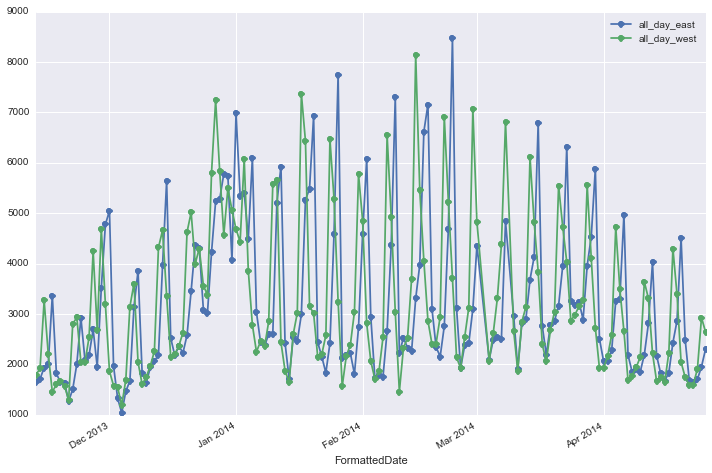

In [955]:
df_traf_plot.plot(marker = 'o')

In [956]:
df_traf_plot.tail()

,all_day_east,all_day_west
FormattedDate,,
2014-04-22,1686,1590
2014-04-23,1642,1601
2014-04-24,1704,1911
2014-04-25,1956,2930
2014-04-26,2306,2641


In [957]:
df_traf_plot = df_traf_plot.rename(columns={'all_day_east':'away_WP', 'all_day_west':'to_WP'})

In [958]:
df_berthoud = df_traf_plot

In [959]:
df_berthoud.head()

,away_WP,to_WP
FormattedDate,,
2013-11-13,1659,1791
2013-11-14,1714,1923
2013-11-15,1935,3269
2013-11-16,2005,2211
2013-11-17,3362,1453


In [960]:
day_of_week = []
for idx, day in df_berthoud.iterrows():
    day_of_week.append(idx.weekday())
    
df_berthoud['day_of_week'] = day_of_week

In [961]:
df_berthoud['net_cars'] = df_berthoud.to_WP - df_berthoud.away_WP
df_berthoud['net_cars'] = df_berthoud['net_cars'].shift(1)
df_berthoud['net_cars'][0] = 0

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [962]:
skiers = []
count = 0
for idx, row in df_berthoud.iterrows():
    count += row.net_cars
    skiers.append(count)

In [963]:
df_berthoud['skiers'] = skiers

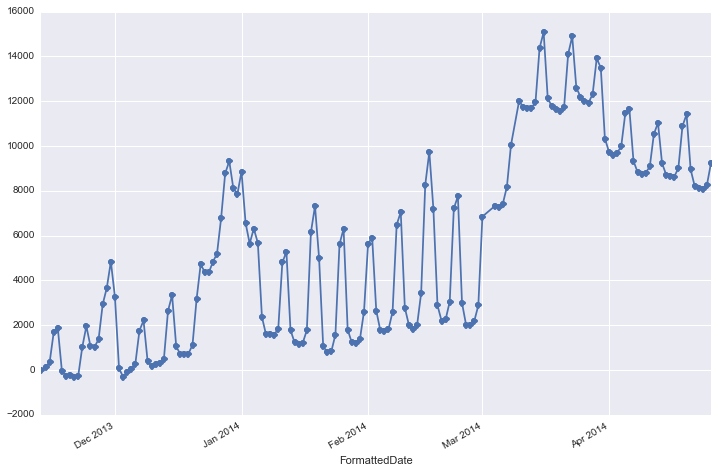

In [964]:
df_berthoud['skiers'].plot(marker='o')

In [965]:
df_berthoud.tail()

,away_WP,to_WP,day_of_week,net_cars,skiers
FormattedDate,,,,,
2014-04-22,1686,1590,1,-745,8207
2014-04-23,1642,1601,2,-96,8111
2014-04-24,1704,1911,3,-41,8070
2014-04-25,1956,2930,4,207,8277
2014-04-26,2306,2641,5,974,9251


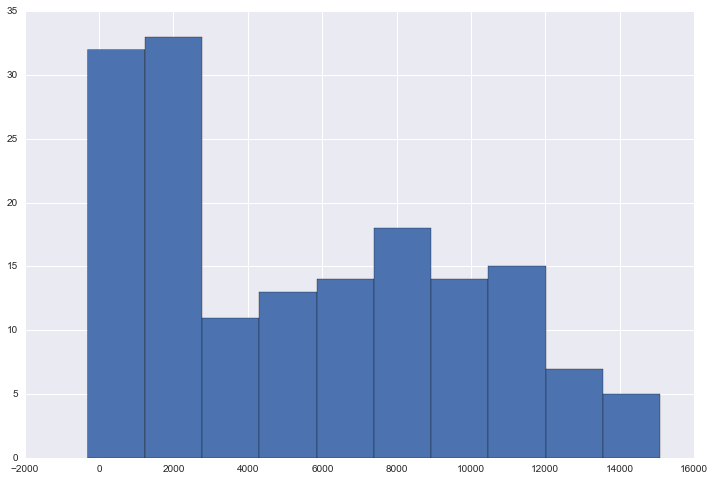

In [966]:
df_berthoud.skiers.hist()

In [967]:
df_berthoud.drop(['net_cars'], axis=1, inplace=True)

In [968]:
df_berthoud.head()

,away_WP,to_WP,day_of_week,skiers
FormattedDate,,,,
2013-11-13,1659,1791,2,0
2013-11-14,1714,1923,3,132
2013-11-15,1935,3269,4,341
2013-11-16,2005,2211,5,1675
2013-11-17,3362,1453,6,1881


In [969]:
df_berthoud.to_csv('../data_ski_in_solitude/berthoud_skiers_13_14.csv')

## Compare plots for the 4 years

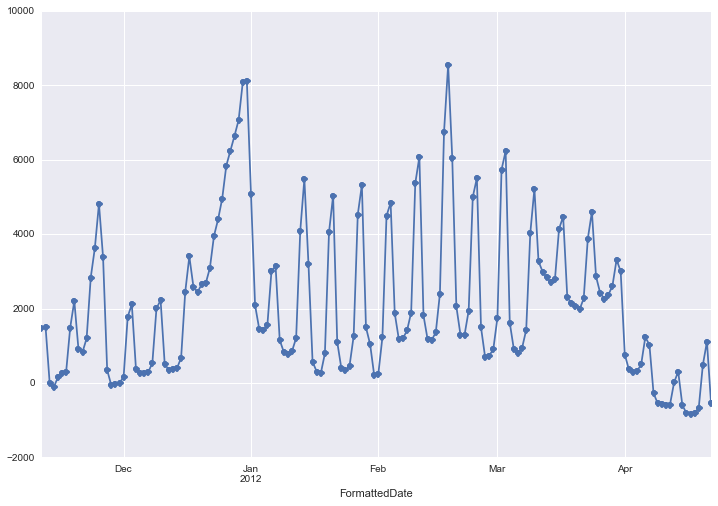

In [861]:
df_11_12 = pd.DataFrame.from_csv('data/berthoud_skiers_11_12.csv')
df_11_12['skiers'].plot(marker='o')

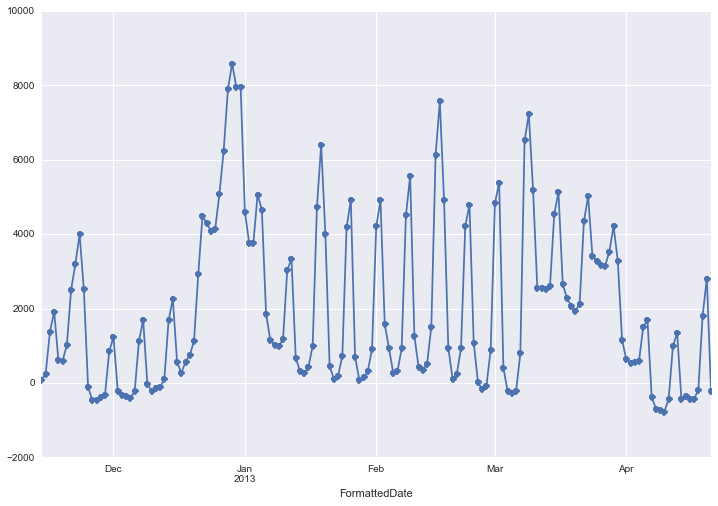

In [860]:
df_12_13 = pd.DataFrame.from_csv('data/berthoud_skiers_12_13.csv')
df_12_13['skiers'].plot(marker='o')

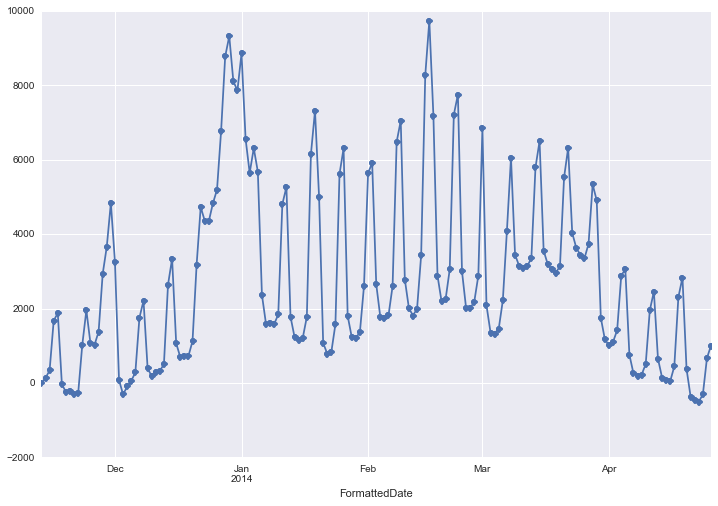

In [856]:
df_13_14 = pd.DataFrame.from_csv('data/berthoud_skiers_13_14.csv')
df_13_14['skiers'].plot(marker='o')

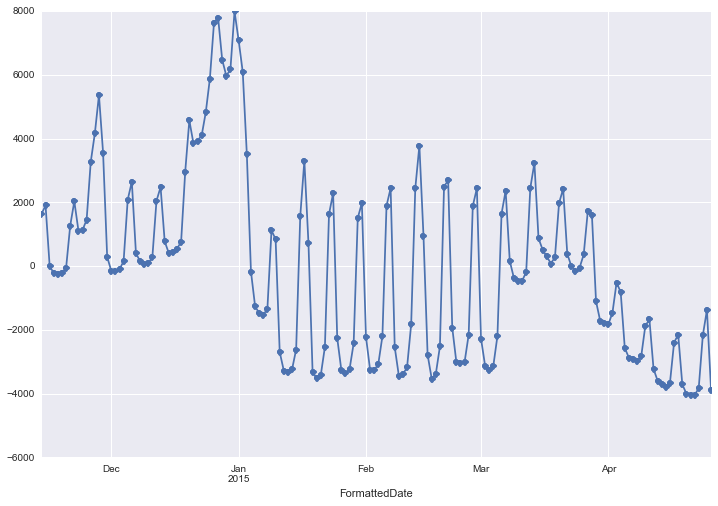

In [863]:
df_14_15 = pd.DataFrame.from_csv('data/berthoud_skiers_14_15.csv')
df_14_15['skiers'].plot(marker='o')